In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
%matplotlib inline

### Dataset Download

In [3]:
symbol = 'TSLA'
df = yf.download(symbol, period='5y',interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-01,17.084000,20.633333,16.306000,19.593332,19.593332,2854662000
2018-05-01,19.567333,20.865999,18.228001,18.982000,18.982000,2333671500
2018-06-01,19.057333,24.915333,18.922667,22.863333,22.863333,3201376500
2018-07-01,24.004667,24.318666,19.075333,19.875999,19.875999,2584923000
2018-08-01,19.865999,25.830667,19.213333,20.110666,20.110666,4160403000


In [5]:
# df.describe()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-04-01 to 2023-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       60 non-null     float64
 1   High       60 non-null     float64
 2   Low        60 non-null     float64
 3   Close      60 non-null     float64
 4   Adj Close  60 non-null     float64
 5   Volume     60 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 KB


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

#### Mpf Plot Styling

In [9]:
# mc = mpf.make_marketcolors(up='g',down='r',inherit=True)
# s = mpf.make_mpf_style(marketcolors=mc)
s = 'yahoo'

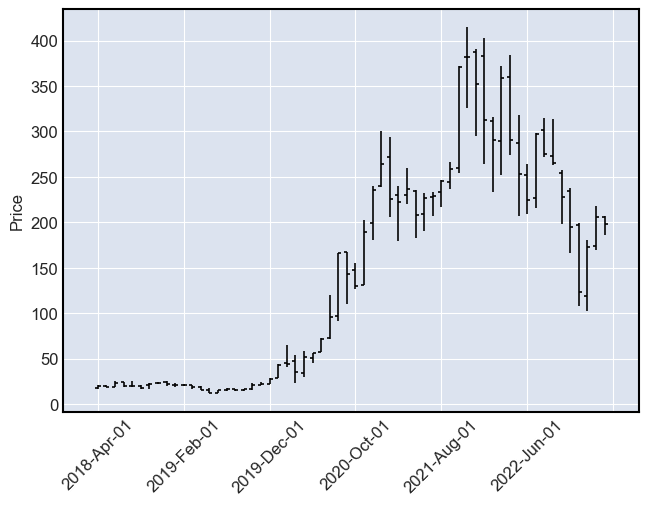

In [10]:
mpf.plot(df)

### Line Chart

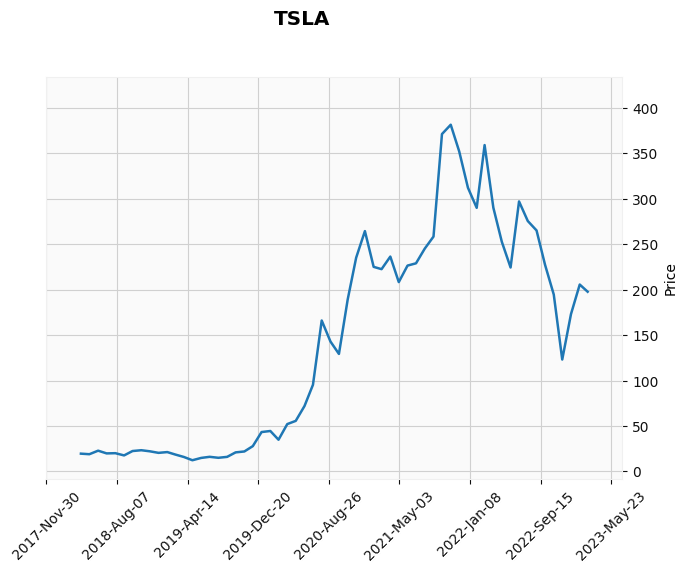

In [11]:
mpf.plot(df, type = 'line', volume = False, style = s, title = symbol, show_nontrading = True)

### Candlestick Chart with Volume

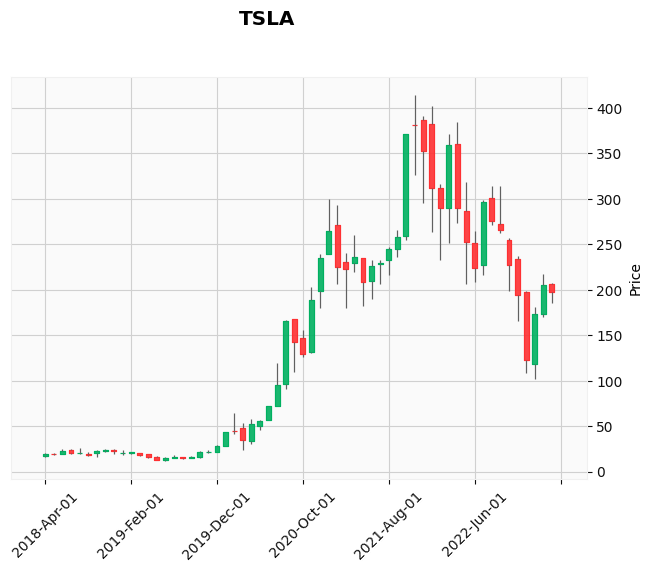

In [12]:
mpf.plot(df, type = 'candle', volume = False, style = s, title = symbol, show_nontrading = False)

### Candlestick Chart with Volume

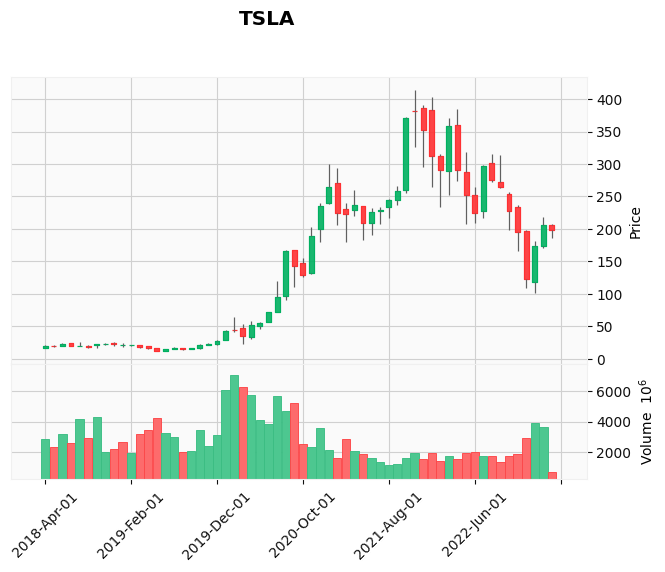

In [13]:
mpf.plot(df, type = 'candle', volume = True, style = s, title = symbol, show_nontrading = False)

### Candlestick Chart with Single Moving Average

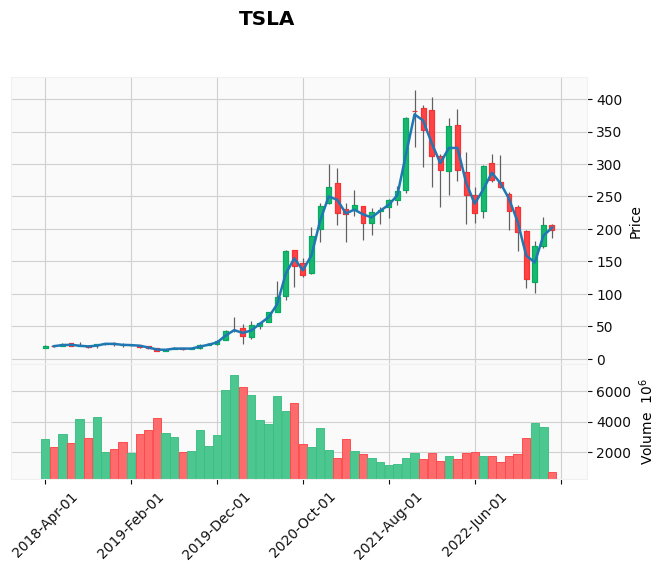

In [14]:
mpf.plot(df, type = 'candle',mav = 2, volume = True, style = s, title = symbol, show_nontrading = False)

### Candlestick Chart with multiple moving averages

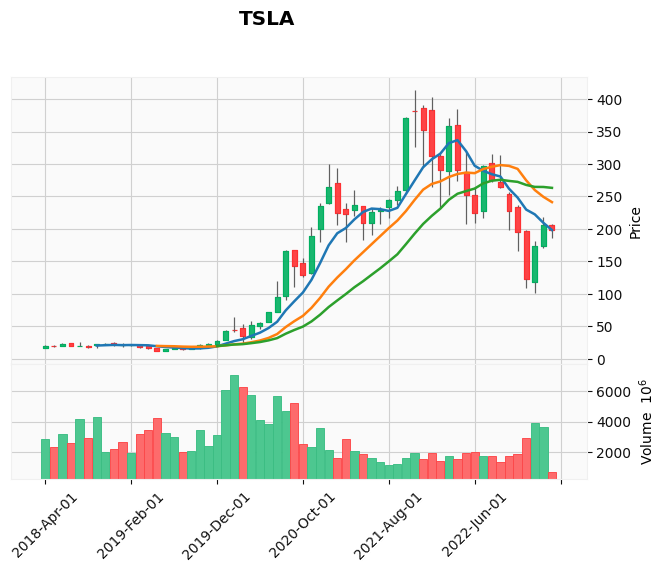

In [15]:
mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = s, title = symbol, show_nontrading = False)

### Prettifying Chart

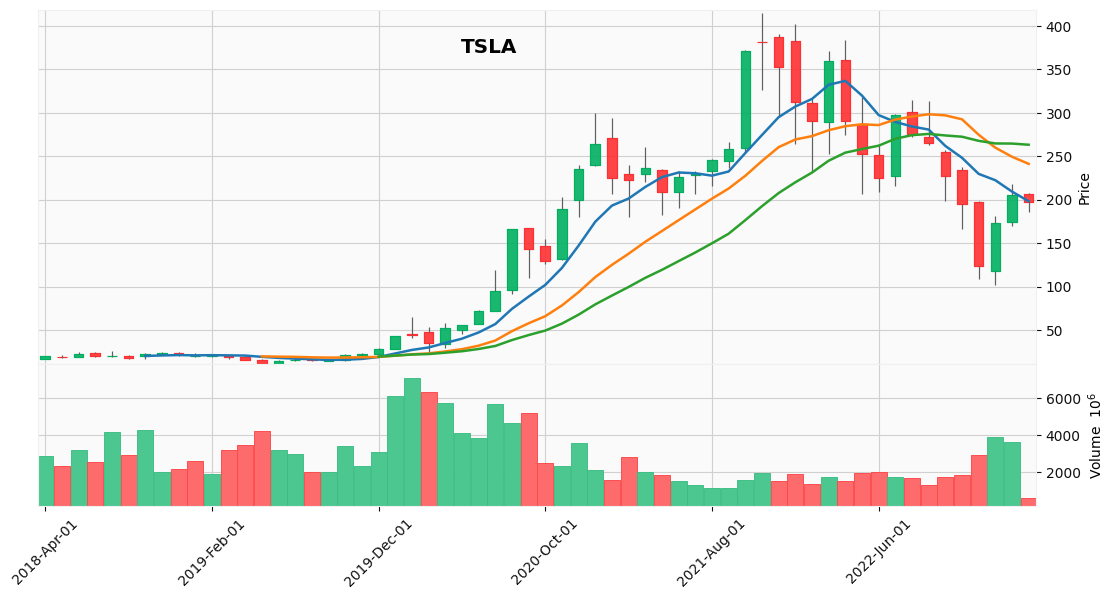

In [16]:
mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = s, title = symbol, show_nontrading = False,
        tight_layout = True, figratio = (10,5), figscale = 1)

### Saving Figs

In [17]:
mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = s, title = symbol, show_nontrading = False,
        tight_layout = True, figratio = (10,5), figscale = 1, savefig ='img.png')

### Panels in mpf

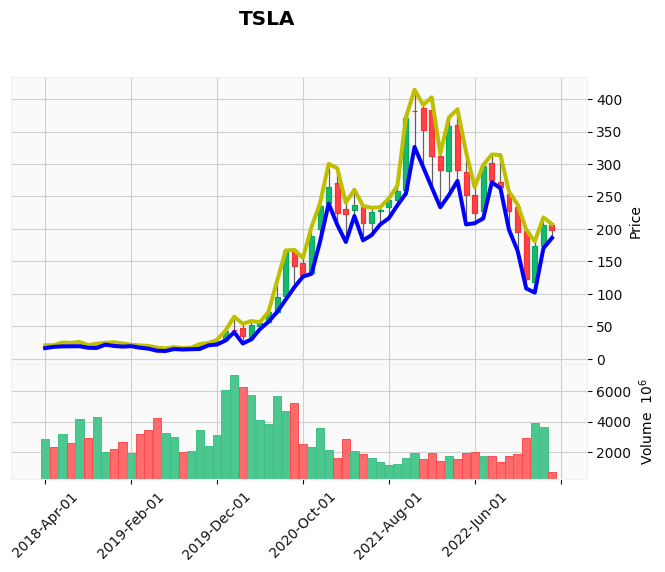

In [18]:
ap0 = [
    mpf.make_addplot(df["High"], color = 'y'), # SUbplots for High and Low
    mpf.make_addplot(df["Low"], color = 'b')    # Panel 0 is used by default
]
mpf.plot(df,type='candle',volume = True,addplot=ap0,title=symbol,style = s, show_nontrading=False)

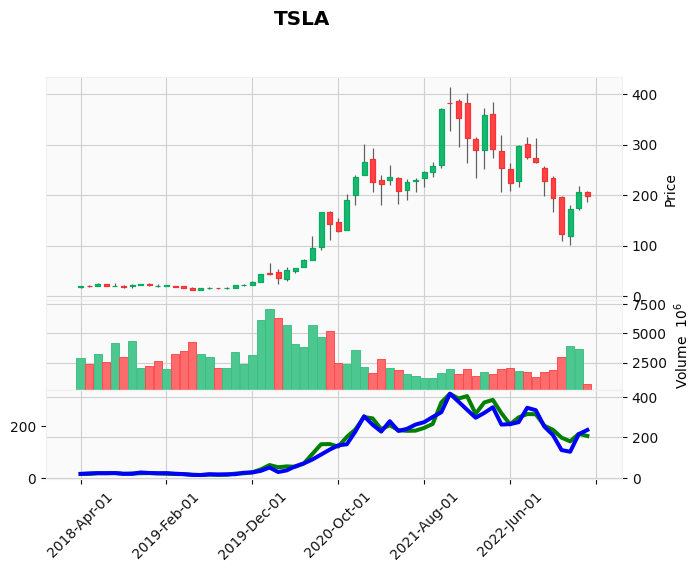

In [19]:
# 3 panels
ap2 = [
    mpf.make_addplot(df["High"], color = 'g', panel=2), # Panel 2 is specified
    mpf.make_addplot(df["Low"], color = 'b', panel=2)
]
mpf.plot(df,type='candle',volume= True, addplot=ap2,title=symbol,style = s, show_nontrading=False)

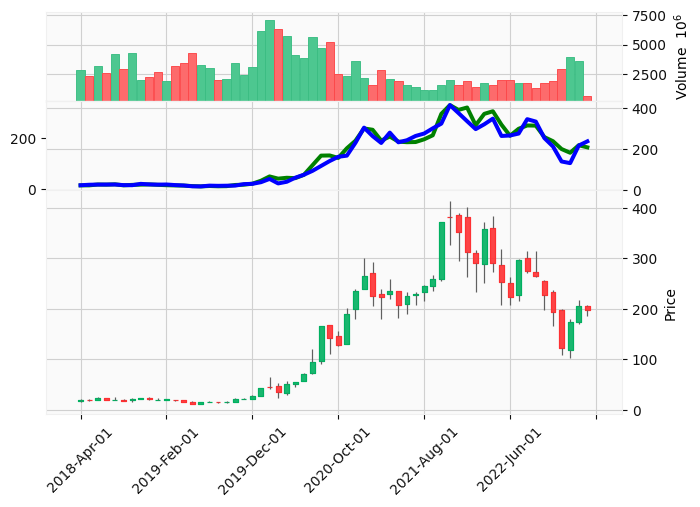

In [20]:
# Changing Panel Ratio
ap2 = [
    mpf.make_addplot(df["High"], color = 'g', panel=1),
    mpf.make_addplot(df["Low"], color = 'b', panel=1)
]
mpf.plot(df,type='candle',volume=True,style = s,main_panel=2,volume_panel=0,addplot=ap2)


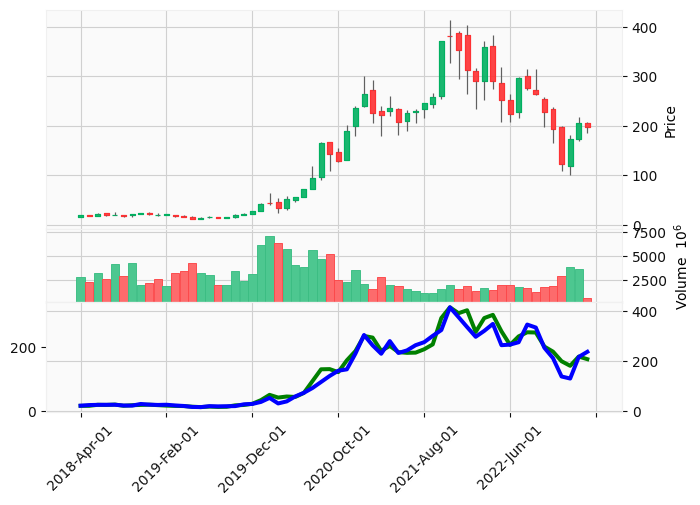

In [21]:
# Panel Ratio
ap2 = [
    mpf.make_addplot(df["High"], color = 'g', panel=2),
    mpf.make_addplot(df["Low"], color = 'b', panel=2)
]
mpf.plot(df,type='candle',volume=True,style = s,main_panel=0,volume_panel=1,addplot=ap2,
         panel_ratios = (6,2,3))


###  MACD Plotting